# Introduction

We are **Vector Nation**. Composed of the following:
- Ariaga, Marian
- Clemente, Francis
- De Guzman, Evan
- Villaflores, Charlize

Taking STINTSY, section S16 under Sir Alvin Alon. 

This **Major Course Output (MCO)** aims to solve both a classification and regression task task using the Philippine Statistics Authority or PSA's <span style="color:green">**Family Income and Expenditure dataset**.</span> 

### The Tasks

In specificity, the group aims to create train and test two machine learning models that can:
1. Classify employment status based on education level and
2. Predict food budget for different family sizes

We will use these three algorithms: (still not sure lmao)
- kNN Clustering Algorithm
- Linear Regression and Logistic Regression
- Neural Networks

# Description of the Data Set

Once again, the data set that we will use is  <span style="color:green">**Family Income and Expenditure dataset**.</span>. The original data set has an enormous 119 variables to use. For the purposes of the tasks at hand, many variables will be cut off 

# List of Requirements

<span style="color:red">**#TODO**</span> Update accordingly depending on what we use in the entirety of the notebook.

# Data Cleaning and Pre-Processing

Loading in Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Eventually we'll add more!

Loading in the csv dataset and splitting into the important features for this classifcaiton problem.



In [2]:
df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")
df

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,1,22000,114062,271.25,963.2264,5.0,...,00,00,00,00,0.902863,30101.60,5,5,7,7
40167,12,9804035000,1,25,2,22000,414067,271.25,588.6253,9.0,...,00,01,00,00,0.902863,14368.89,1,5,7,3
40168,12,9804035000,2,51,2,22000,414067,271.25,588.6253,6.0,...,00,00,00,00,0.902863,19137.33,3,4,6,4
40169,12,9804035000,3,75,2,22000,414067,271.25,588.6253,5.0,...,00,01,00,00,0.902863,30985.00,5,6,7,7


In [3]:
reg_df = df[["FSIZE", "TOINC", "AGELESS5", "AGE5_17", "EMPLOYED_PAY", "EMPLOYED_PROF", "W_REGN", "URB"]] 
class_df = df[["WAGES", "TENURE", "CW", "PCINC", "JOB", "OCCUP"]] 

print("Total length of a dataset is: ", len(df))

Total length of a dataset is:  40171


In [4]:
#Checking for any null values per feature.
class_df[["WAGES", "TENURE", "CW", "PCINC", "JOB", "OCCUP"]].isnull().sum()
reg_df[["FSIZE", "TOINC", "AGELESS5", "AGE5_17", "EMPLOYED_PAY", "EMPLOYED_PROF", "W_REGN", "URB"]] .isnull().sum 

<bound method DataFrame.sum of        FSIZE  TOINC  AGELESS5  AGE5_17  EMPLOYED_PAY  EMPLOYED_PROF  W_REGN  \
0      False  False     False    False         False          False   False   
1      False  False     False    False         False          False   False   
2      False  False     False    False         False          False   False   
3      False  False     False    False         False          False   False   
4      False  False     False    False         False          False   False   
...      ...    ...       ...      ...           ...            ...     ...   
40166  False  False     False    False         False          False   False   
40167  False  False     False    False         False          False   False   
40168  False  False     False    False         False          False   False   
40169  False  False     False    False         False          False   False   
40170  False  False     False    False         False          False   False   

         URB  
0    

In [5]:
print(class_df.isna().sum())
print(reg_df.isna().sum())

WAGES     0
TENURE    0
CW        0
PCINC     0
JOB       0
OCCUP     0
dtype: int64
FSIZE            0
TOINC            0
AGELESS5         0
AGE5_17          0
EMPLOYED_PAY     0
EMPLOYED_PROF    0
W_REGN           0
URB              0
dtype: int64


In [6]:
class_df.dtypes
class_df['ID'] = range(1, len(class_df) + 1)
reg_df['ID'] = range(1, len(class_df) + 1)

/var/folders/xx/0r8s9srs39q5hgvf12xgp81m0000gn/T/ipykernel_97351/893284342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['ID'] = range(1, len(class_df) + 1)
/var/folders/xx/0r8s9srs39q5hgvf12xgp81m0000gn/T/ipykernel_97351/893284342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['ID'] = range(1, len(class_df) + 1)


Checking for outliers

array([[<Axes: title={'center': 'WAGES'}>,
        <Axes: title={'center': 'TENURE'}>],
       [<Axes: title={'center': 'PCINC'}>,
        <Axes: title={'center': 'JOB'}>],
       [<Axes: title={'center': 'ID'}>, <Axes: >]], dtype=object)

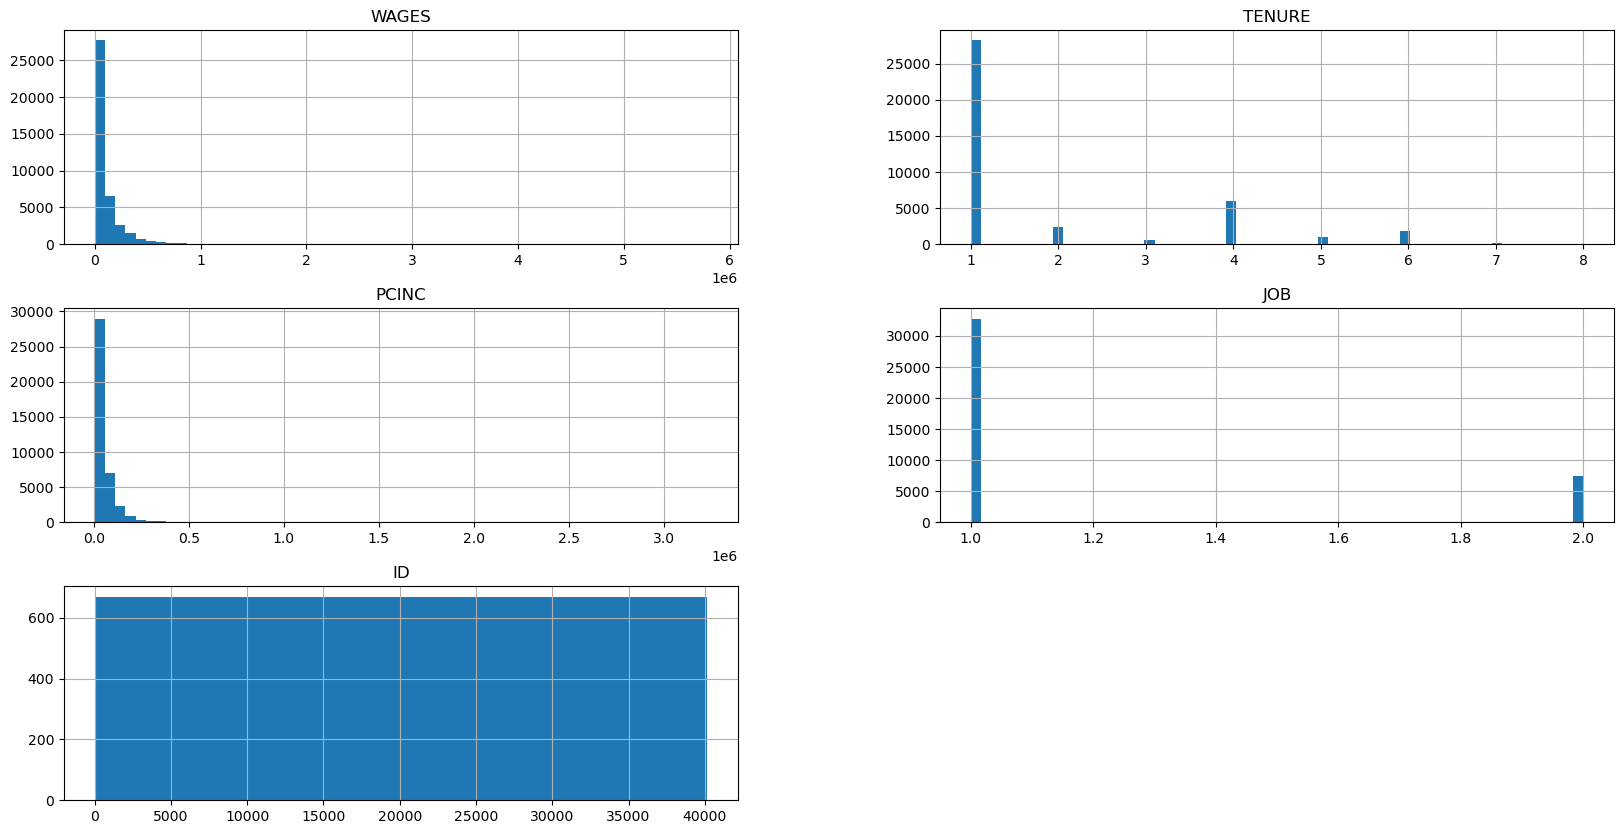

In [7]:
class_df.hist(bins=60, figsize=(20,10))

<Axes: xlabel='ID', ylabel='PCINC'>

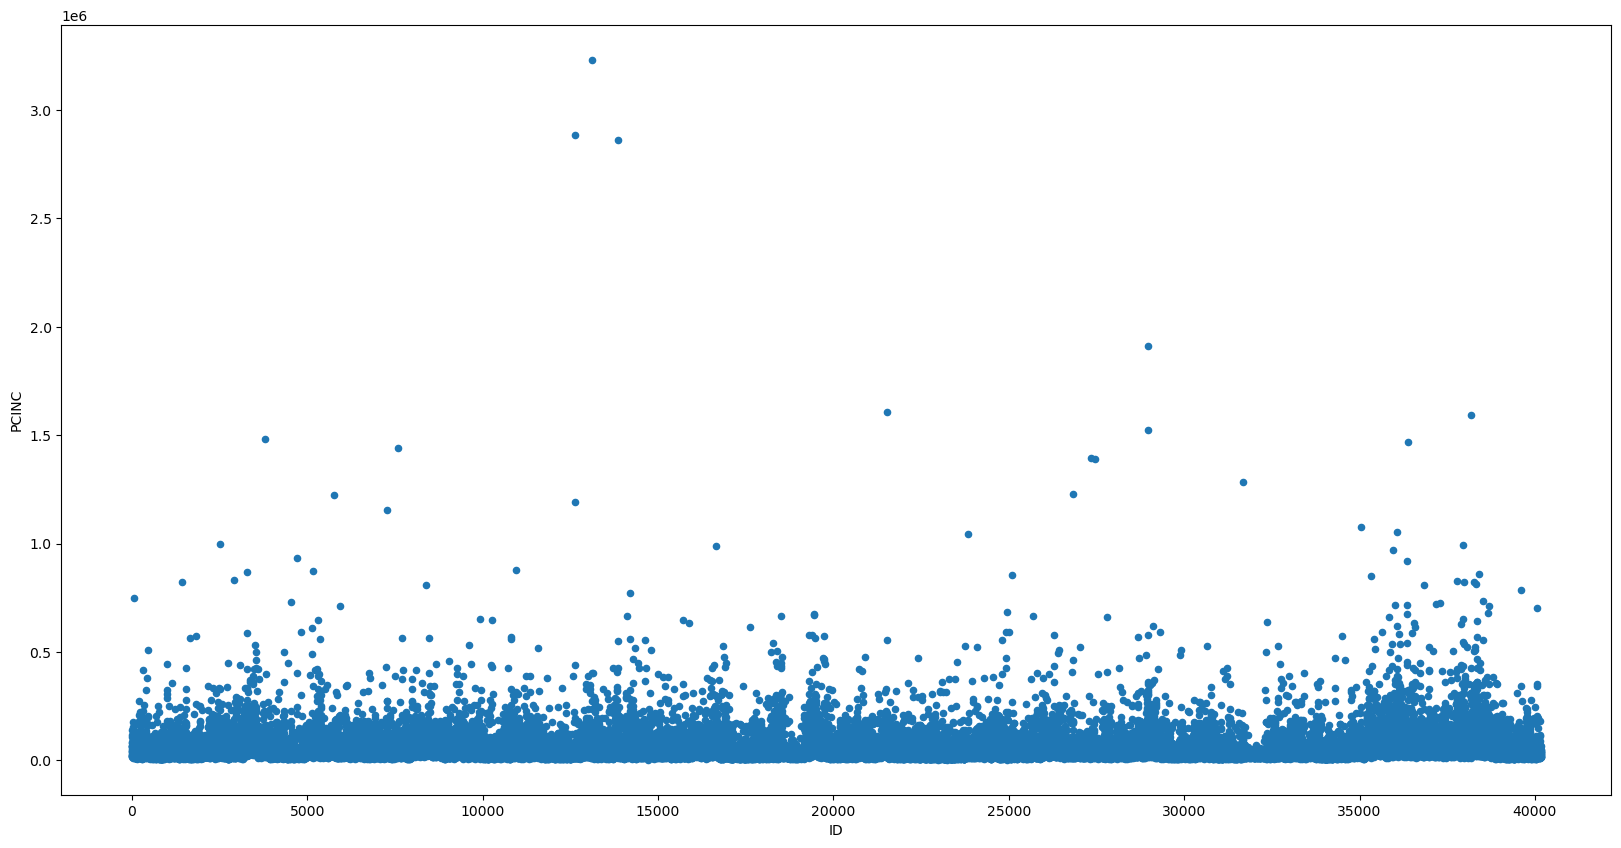

In [9]:
class_df[["ID", "PCINC"]].plot(kind="scatter", x="ID", y="PCINC", figsize=(20,10))

<Axes: xlabel='ID', ylabel='WAGES'>

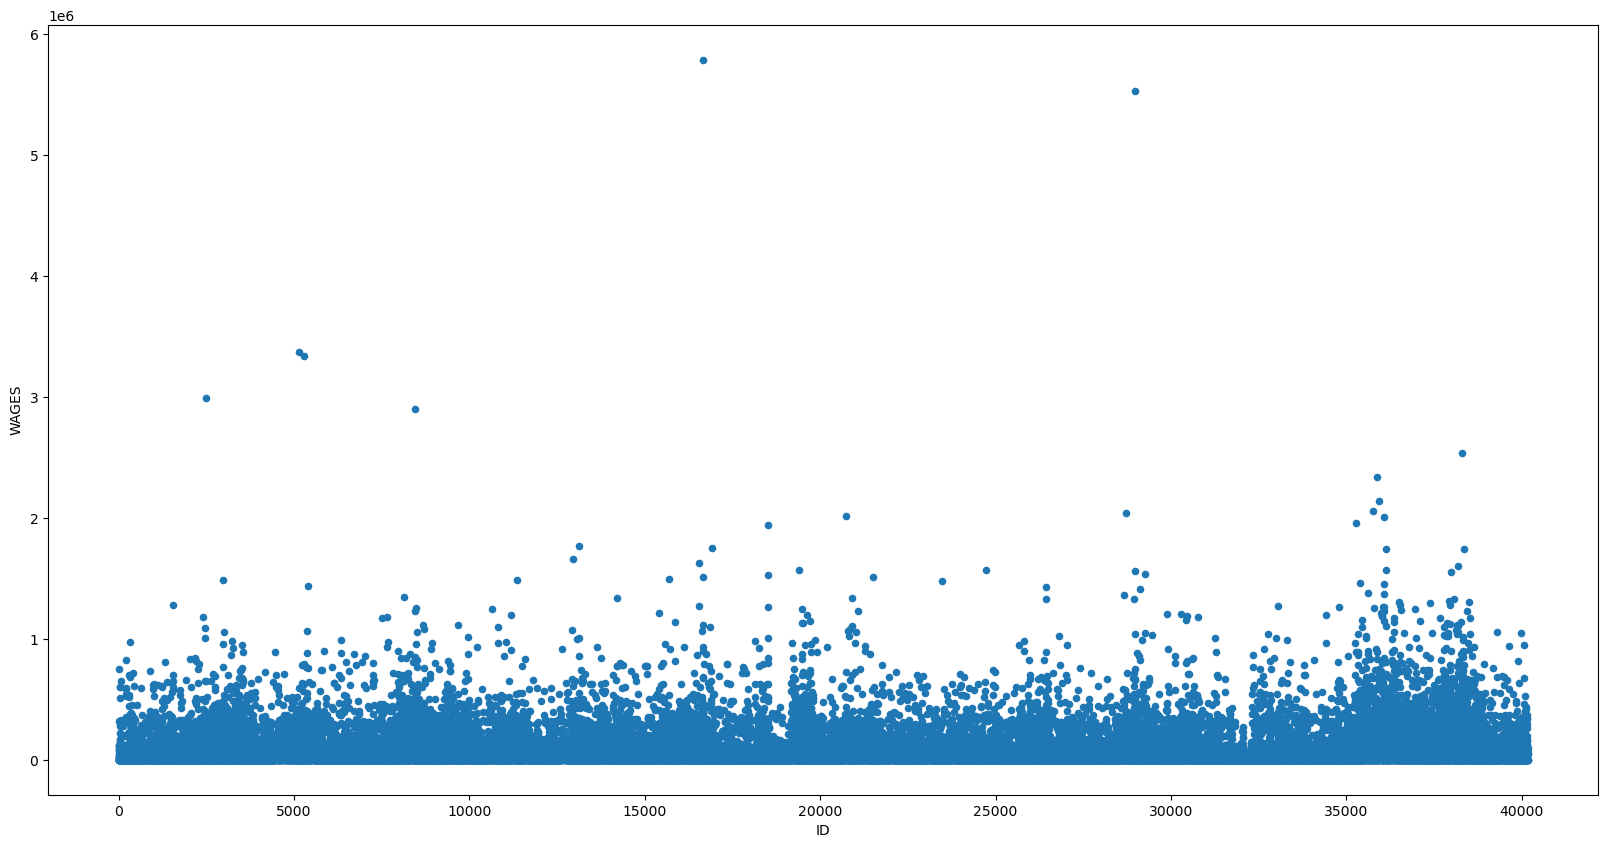

In [10]:
class_df[["ID", "WAGES"]].plot(kind="scatter", x="ID", y="WAGES", figsize=(20,10))

In [11]:
class_df = class_df[class_df["CW"] != " "]
print(class_df["CW"].value_counts())

CW
3    13622
1    12919
2     2676
4     2643
0      677
6      252
5        8
Name: count, dtype: int64


array([[<Axes: title={'center': 'FSIZE'}>,
        <Axes: title={'center': 'TOINC'}>],
       [<Axes: title={'center': 'W_REGN'}>,
        <Axes: title={'center': 'URB'}>],
       [<Axes: title={'center': 'ID'}>, <Axes: >]], dtype=object)

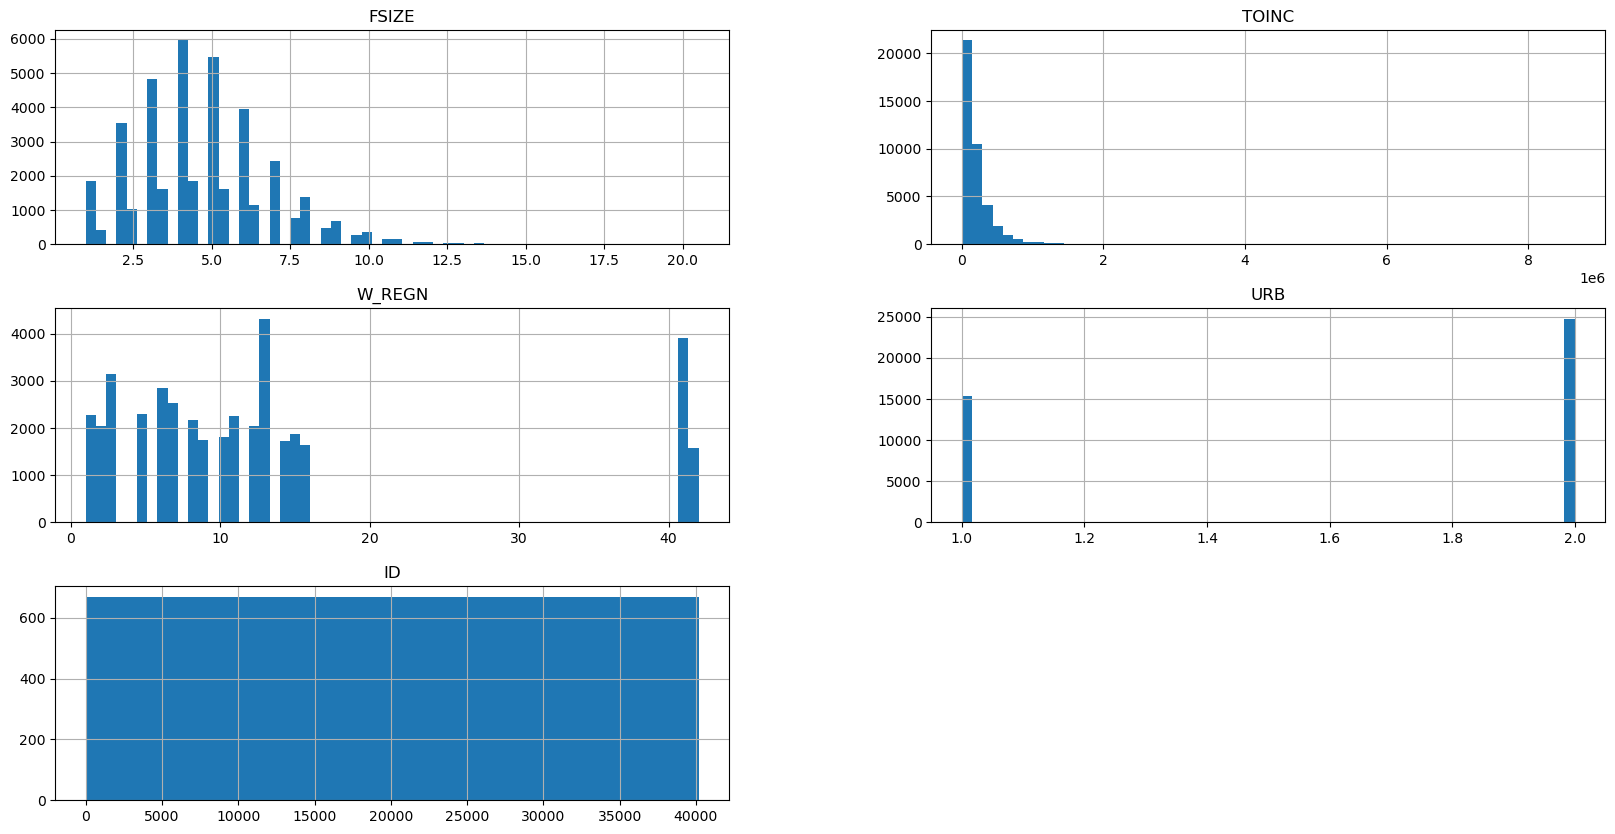

In [12]:
reg_df.hist(bins=60, figsize=(20,10))

<Axes: xlabel='ID', ylabel='TOINC'>

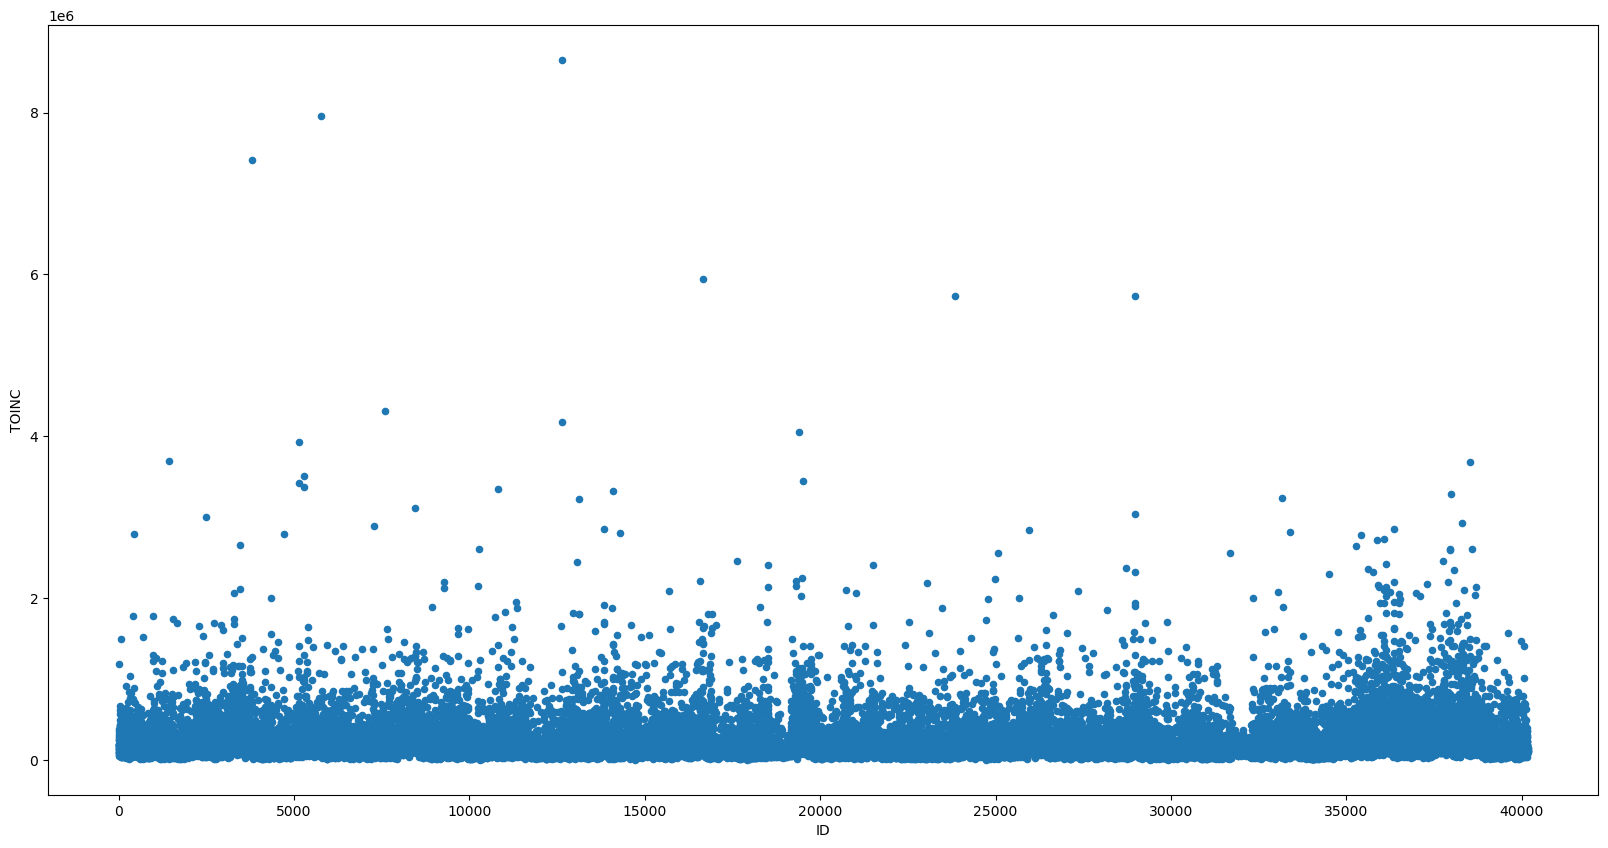

In [13]:
reg_df[["ID", "TOINC"]].plot(kind="scatter", x="ID", y="TOINC", figsize=(20,10))

In [14]:
#Just removing duplicates incase that their is.
class_df.drop_duplicates()
reg_df.drop_duplicates()

,FSIZE,TOINC,AGELESS5,AGE5_17,EMPLOYED_PAY,EMPLOYED_PROF,W_REGN,URB,ID
0,3.0,325251,,01,,,14,2,1
1,12.5,382895,02,04,,01,14,2,2
2,2.0,173985,,,,,14,2,3
3,4.0,173303,,02,,01,14,2,4
4,5.0,187409,,02,01,01,14,2,5
...,...,...,...,...,...,...,...,...,...
40166,5.0,150508,01,03,00,01,12,1,40167
40167,9.0,129320,00,04,01,00,12,2,40168
40168,6.0,114824,01,01,00,02,12,2,40169
40169,5.0,154925,,01,01,00,12,2,40170


Splitting the data into 80% Training and 20% Testing for the classification problem.

In [ ]:
X = class_df.drop(columns=["JOB"])
y = class_df["JOB"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

# EDA